## Day 17

In [1]:
def readInput17(filename):
    with open(filename) as f:
        grid = {}
        lines = f.read().strip().splitlines()
        for y,l in enumerate(lines):
            for x,c in enumerate(l.strip("\n")):
                grid[(x,y)]=int(c)
        return grid,len(lines[0]),len(lines)

In [61]:
from queue import PriorityQueue
from collections import defaultdict

def least_heat_loss(grid,S,E,max_moves=3): 

    queue = PriorityQueue()
    queue.put((0,[S],(0,0),0)) # heatloss, path, movement, how many times last movement was made
    visited = defaultdict(bool)

    while True:

        heatloss,path,move,nmove = queue.get()
        curr = path[-1]
        if curr==E:
            return heatloss, path

        # avoid already-visited positions from this specific movement
        if visited[(curr,move,nmove)]: 
            continue

        # add current position to visited set
        visited[(curr,move,nmove)] = True

        # current position and direction of movement
        x,y = curr
        dxm,dym = move

        if nmove<max_moves and move!=(0,0): # can still go in current direction
            p = (x+dxm,y+dym)
            if p not in grid.keys(): # avoid grid boundaries
                continue
            else:
                queue.put((heatloss+grid[p],list(path)+[p],move,nmove+1))

        for m in [ (-1,0), (+1,0), (0,-1), (0,+1) ]: # all possible directions
            if m != move and m != (-dxm,-dym): # cannot go back, and forward is already considered
                p = (x+m[0],y+m[1])
                if p not in grid.keys(): # avoid grid boundaries
                    continue
                else:
                    queue.put((heatloss+grid[p],list(path)+[p],m,1))

grid,xmax,ymax = readInput17("examples/example17.txt")
#grid,xmax,ymax = readInput17("AOC2023inputs/input17.txt")

S = (0,0)
E = (xmax-1,ymax-1)
heatloss,path = least_heat_loss(grid,S,E,max_moves=3)
print(heatloss) # should be 102

114


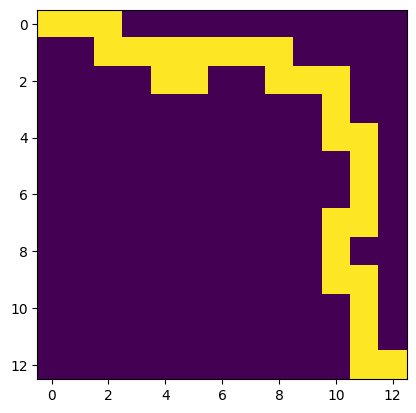

In [59]:
import matplotlib.pyplot as plt
import numpy as np

road = np.zeros((ymax,xmax))
for x,y in path:
    road[y,x]=1
    
plt.imshow(road)